In [1]:
from Project import *

p = project()

URL_DATA =  'https://storage.dosm.gov.my/demography/death_maternal_state.parquet'

df = p.load_data(URL_DATA)

if df is not None:
    df = p.process_date_column(df)
    print(df)
else:
    print("Failed to load data.")

              state       date  abs  rate
0             Johor 2000-01-01   13  19.4
1             Johor 2001-01-01    9  14.7
2             Johor 2002-01-01   12  20.1
3             Johor 2003-01-01   11  18.9
4             Johor 2004-01-01   14  24.4
..              ...        ...  ...   ...
353  W.P. Putrajaya 2018-01-01    0   0.0
354  W.P. Putrajaya 2019-01-01    0   0.0
355  W.P. Putrajaya 2020-01-01    0   0.0
356  W.P. Putrajaya 2021-01-01    1  47.5
357  W.P. Putrajaya 2022-01-01    1  54.4

[358 rows x 4 columns]


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   state   358 non-null    object        
 1   date    358 non-null    datetime64[ns]
 2   abs     358 non-null    int64         
 3   rate    358 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [3]:
# first 5
df.head
# last 5
df.tail

<bound method NDFrame.tail of               state       date  abs  rate
0             Johor 2000-01-01   13  19.4
1             Johor 2001-01-01    9  14.7
2             Johor 2002-01-01   12  20.1
3             Johor 2003-01-01   11  18.9
4             Johor 2004-01-01   14  24.4
..              ...        ...  ...   ...
353  W.P. Putrajaya 2018-01-01    0   0.0
354  W.P. Putrajaya 2019-01-01    0   0.0
355  W.P. Putrajaya 2020-01-01    0   0.0
356  W.P. Putrajaya 2021-01-01    1  47.5
357  W.P. Putrajaya 2022-01-01    1  54.4

[358 rows x 4 columns]>

In [4]:
df.describe()

,date,abs,rate
count,358,358.000000,358.000000
mean,2011-03-08 10:43:34.525139712,8.737430,27.847486
min,2000-01-01 00:00:00,0.000000,0.000000
25%,2005-04-02 06:00:00,3.000000,17.700000
50%,2011-01-01 00:00:00,7.000000,24.400000
75%,2017-01-01 00:00:00,12.000000,34.250000
max,2022-01-01 00:00:00,80.000000,328.500000
std,NaN,7.987967,24.646369


In [5]:
df.rate.describe()

count    358.000000
mean      27.847486
std       24.646369
min        0.000000
25%       17.700000
50%       24.400000
75%       34.250000
max      328.500000
Name: rate, dtype: float64

In [6]:
mean_rate, median_rate, std_dev_rate = p.calculate_statistics(df)
print(f"Mean Rate: {mean_rate}, Median Rate: {median_rate}, Std Dev: {std_dev_rate}")

Mean Rate: 27.84748603351956, Median Rate: 24.4, Std Dev: 24.611922710142508


In [7]:
# Filter high rates
high_rates = p.filter_high_rates(df)
print(f"High Rates: {high_rates}")

High Rates: [ 50.2  64.   81.7  74.8  65.2  75.8  51.5  83.4  76.1  70.9  64.9  50.5
  50.9  50.7  69.5  50.5 107.7  62.9  75.5  57.6  67.3  88.8  57.  126.3
  59.5  61.3  57.1  58.3 328.5 145.6  65.3  69.7  54.4]


In [34]:
additional_rates = np.random.rand(len(df['rate']))  # Example additional rates
combined_rates = p.adjust_and_combine_rates(df, additional_rates)
df['combined_rate'] = combined_rates

print(df)

              state       date  abs  rate  combined_rate  Year
0             Johor 2000-01-01   13  19.4      19.422898  2000
1             Johor 2001-01-01    9  14.7      15.370214  2001
2             Johor 2002-01-01   12  20.1      20.524188  2002
3             Johor 2003-01-01   11  18.9      19.744176  2003
4             Johor 2004-01-01   14  24.4      24.710455  2004
..              ...        ...  ...   ...            ...   ...
353  W.P. Putrajaya 2018-01-01    0   0.0       0.209414  2018
354  W.P. Putrajaya 2019-01-01    0   0.0       0.855251  2019
355  W.P. Putrajaya 2020-01-01    0   0.0       0.328448  2020
356  W.P. Putrajaya 2021-01-01    1  47.5      47.937010  2021
357  W.P. Putrajaya 2022-01-01    1  54.4      54.893585  2022

[358 rows x 6 columns]


In [9]:
# rate more than 50
df[df["rate"]>50]

,state,date,abs,rate,combined_rate
7,Johor,2007-01-01,29,50.2,51.128836
21,Johor,2021-01-01,32,64.0,64.246309
44,Kedah,2021-01-01,27,81.7,82.009203
67,Kelantan,2021-01-01,26,74.8,75.471317
71,Melaka,2002-01-01,9,65.2,65.471452
90,Melaka,2021-01-01,10,75.8,76.098971
111,Pahang,2019-01-01,9,51.5,52.032143
113,Pahang,2021-01-01,14,83.4,83.816410
116,Negeri Sembilan,2001-01-01,21,76.1,76.478951
117,Negeri Sembilan,2002-01-01,19,70.9,71.100374


In [10]:
# state with rate more than 50
high_df = p.filter_and_group_data(df) 
print(high_df)

                state  count
0               Johor      2
1               Kedah      1
2            Kelantan      1
3              Melaka      2
4     Negeri Sembilan      2
5              Pahang      2
6               Perak      1
7              Perlis      4
8        Pulau Pinang      2
9               Sabah      4
10           Selangor      1
11  W.P. Kuala Lumpur      1
12        W.P. Labuan      7
13     W.P. Putrajaya      3


In [11]:
df.corr(numeric_only = True)

,abs,rate,combined_rate
abs,1.00000,0.326150,0.325600
rate,0.32615,1.000000,0.999932
combined_rate,0.32560,0.999932,1.000000


In [12]:
# The diagonal values (abs with abs and rate with rate) are 1.00000. This is expected because any variable is perfectly correlated with itself.
# There is a moderate positive correlation between abs and rate of 0.32615.
# It suggests that as the absolute number of maternal deaths increases, the rate of Maternal Mortality tends to increase as well, but not in a strong linear fashion.

In [13]:
df.cov(numeric_only=True)

,abs,rate,combined_rate
abs,63.807615,64.210543,64.118335
rate,64.210543,607.443509,607.554710
combined_rate,64.118335,607.554710,607.748587


In [14]:
# The diagonal values represent the variance of each variable:
# 63.807615: Variance of abs.
# 607.443509: Variance of rate.
# The off-diagonal values (64.210543) represent the covariance between abs and rate.
# The positive covariance indicates that there is a tendency for abs and rate to increase together. 

In [15]:
df[df['rate'].isna()]

,state,date,abs,rate,combined_rate


In [16]:
df[df['abs'].isna()]

,state,date,abs,rate,combined_rate


In [17]:
state_df = p.aggregate_state_data(df) 
state_df

,State,Cases,Rate
0,Johor,23,601.9
1,Kedah,23,674.2
2,Kelantan,23,740.0
3,Melaka,23,609.3
4,Negeri Sembilan,23,761.6
5,Pahang,23,699.9
6,Perak,23,629.4
7,Perlis,23,535.9
8,Pulau Pinang,23,644.7
9,Sabah,23,809.2


In [18]:
p.save_dataframe_to_csv(state_df, "Total Rate for each State")

Data saved to Total Rate for each State


In [19]:
state_df.State.unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

<Axes: >

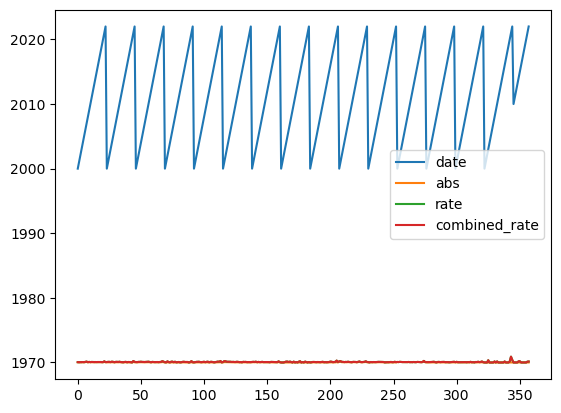

In [20]:
df.plot()

<Axes: >

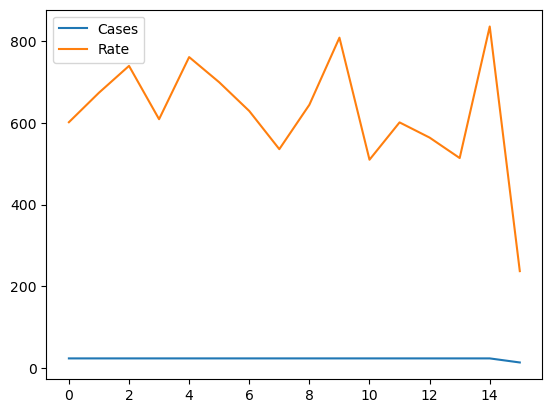

In [21]:
state_df.plot()

<Axes: >

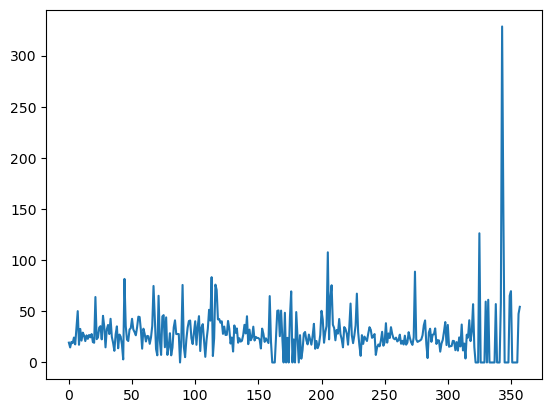

In [22]:
df.rate.plot()

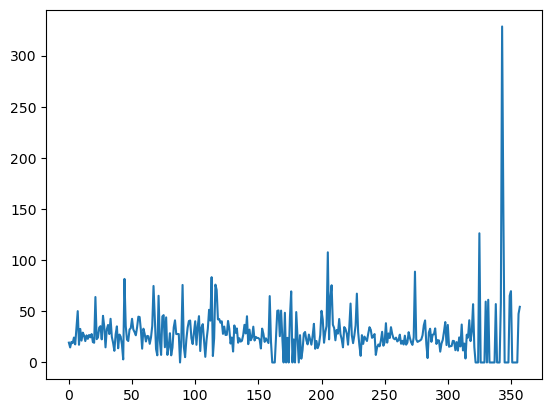

In [23]:
df.rate.plot()
plt.show()

<Axes: >

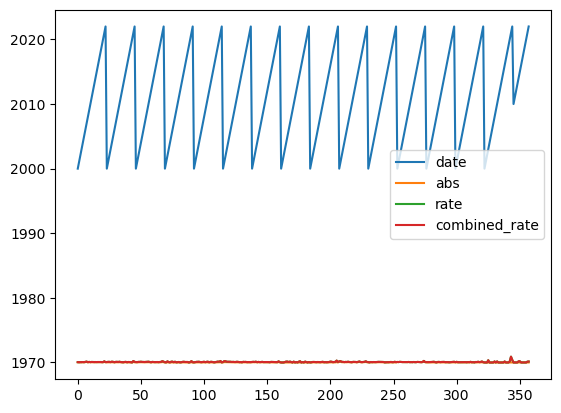

In [24]:
df.plot.line()

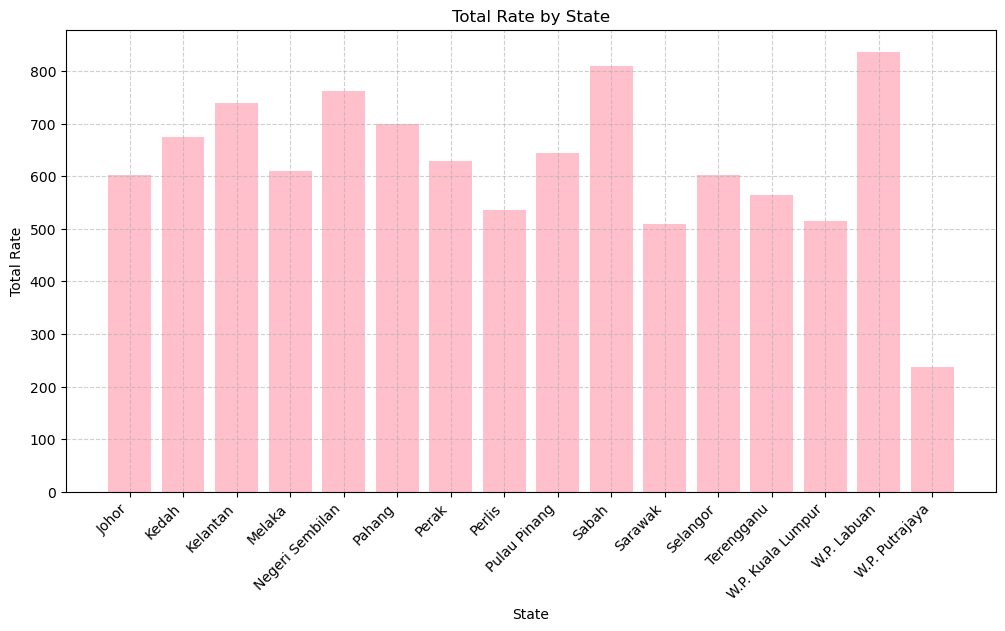

In [25]:
# Plot with custom parameters
p.plot_bar_chart(state_df, x='State', y='Rate', color='pink', xlabel='State', ylabel='Total Rate', title='Total Rate by State')

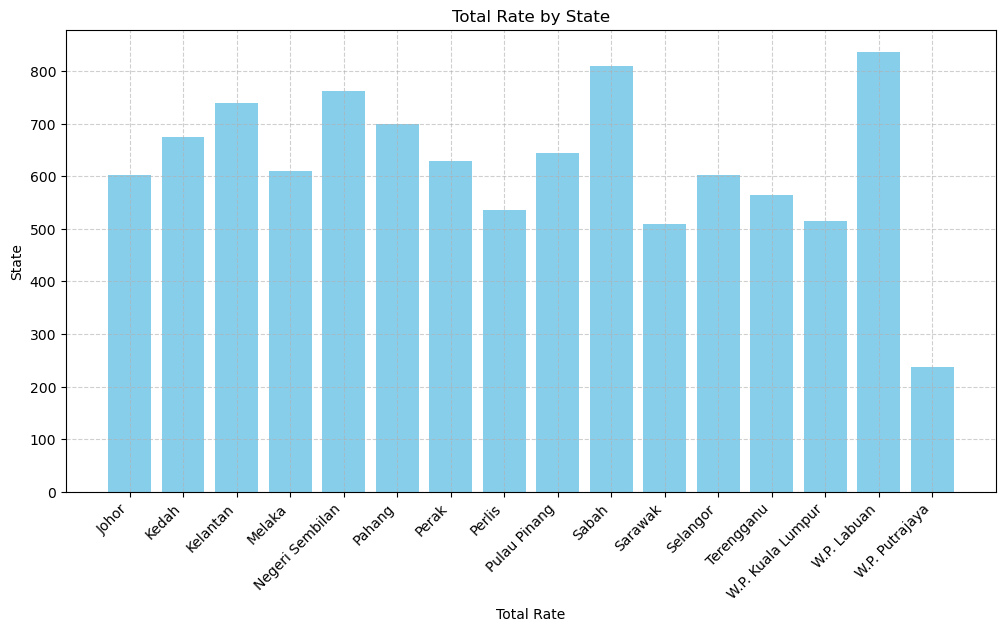

In [26]:
# Plot with different custom parameters
p.plot_bar_chart(state_df, x='State', y='Rate', color='skyblue', xlabel='Total Rate', ylabel='State', title='Total Rate by State')

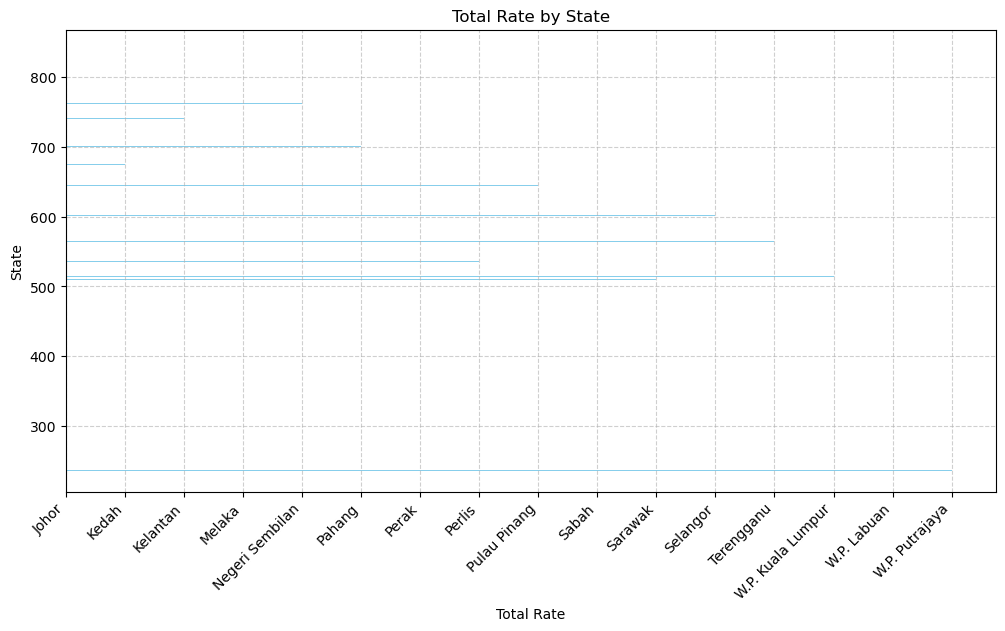

In [27]:
p.plot_horizontal_bar_chart(state_df, x='State', y='Rate', xlabel='Total Rate', ylabel='State', title='Total Rate by State')

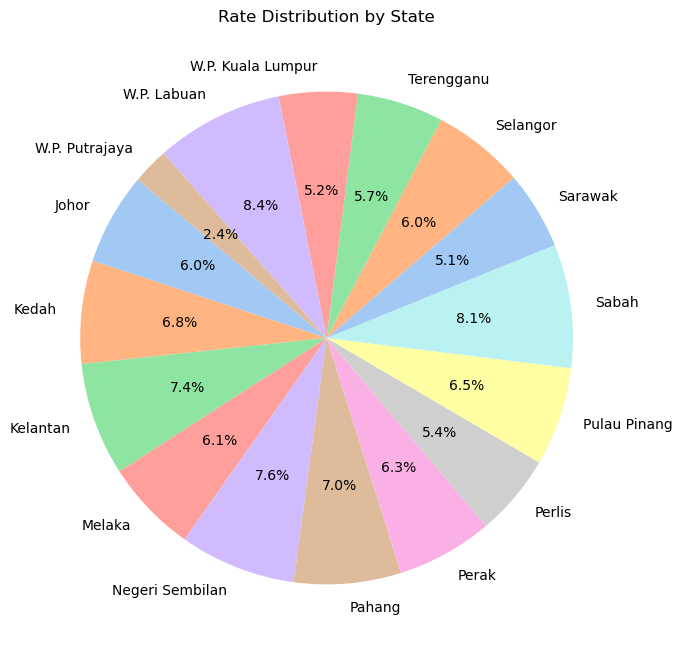

In [28]:
p.plot_pie_chart(state_df, values='Rate', labels='State', colors=sns.color_palette('pastel'), title='Rate Distribution by State')

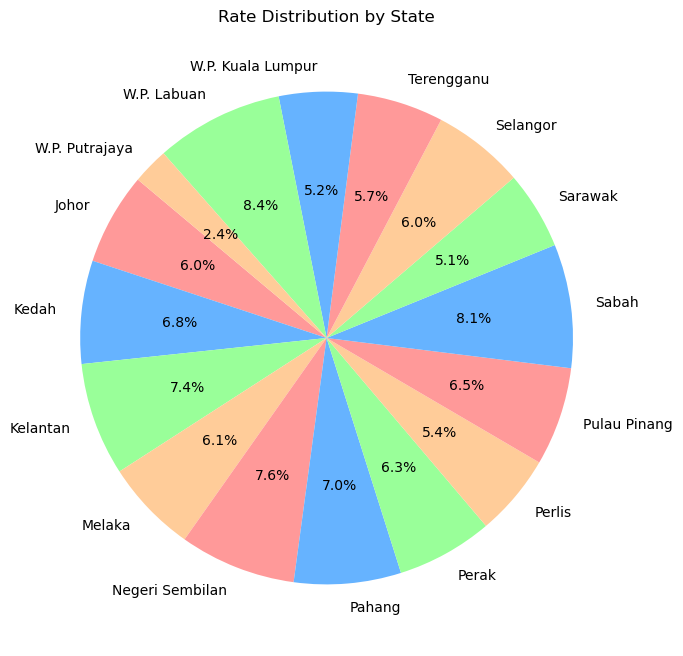

Pie chart saved as state_rate_distribution.pdf


<Figure size 640x480 with 0 Axes>

In [29]:
p.plot_pie_chart(state_df, values='Rate', labels='State', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], title='Rate Distribution by State', save_as_pdf=True, filename='state_rate_distribution.pdf')

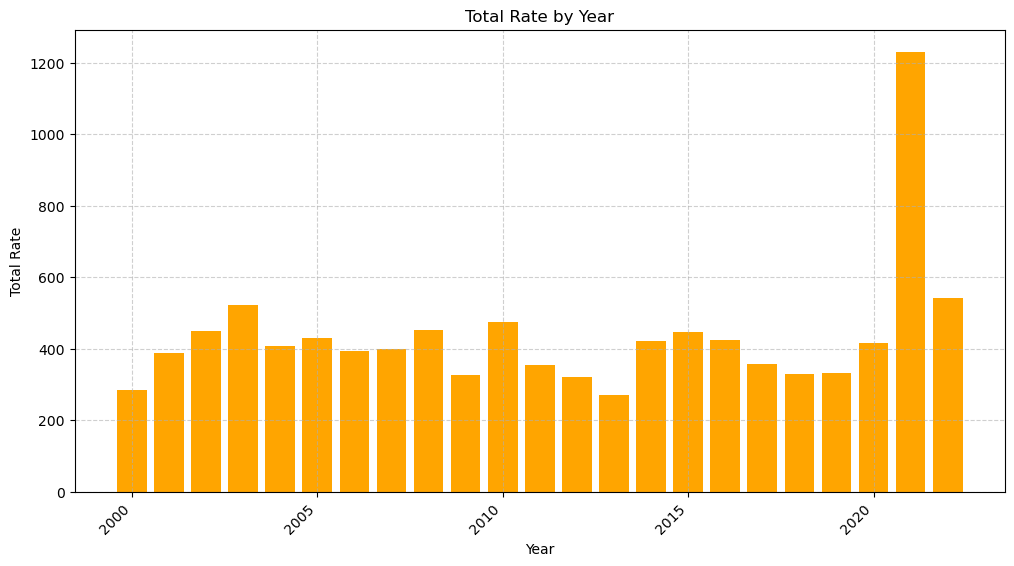

In [30]:
yearly_df = p.aggregate_yearly_data(df) 
    
# Plot yearly data as a bar chart
p.plot_bar_chart(yearly_df, x='Year', y='Total Rate', color='orange', xlabel='Year', ylabel='Total Rate', title='Total Rate by Year')
# After 2020 has higher number of cases

# can compare 2 year/2 state...

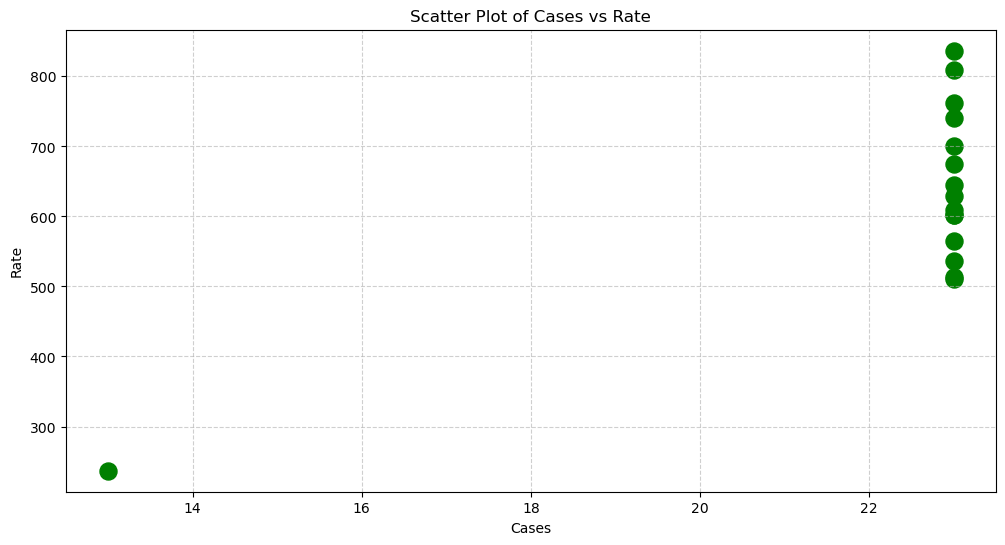

In [31]:
p.plot_scatter_plot(state_df, x='Cases', y='Rate', color='green', xlabel='Cases', ylabel='Rate', title='Scatter Plot of Cases vs Rate', size=150, alpha=0.6)

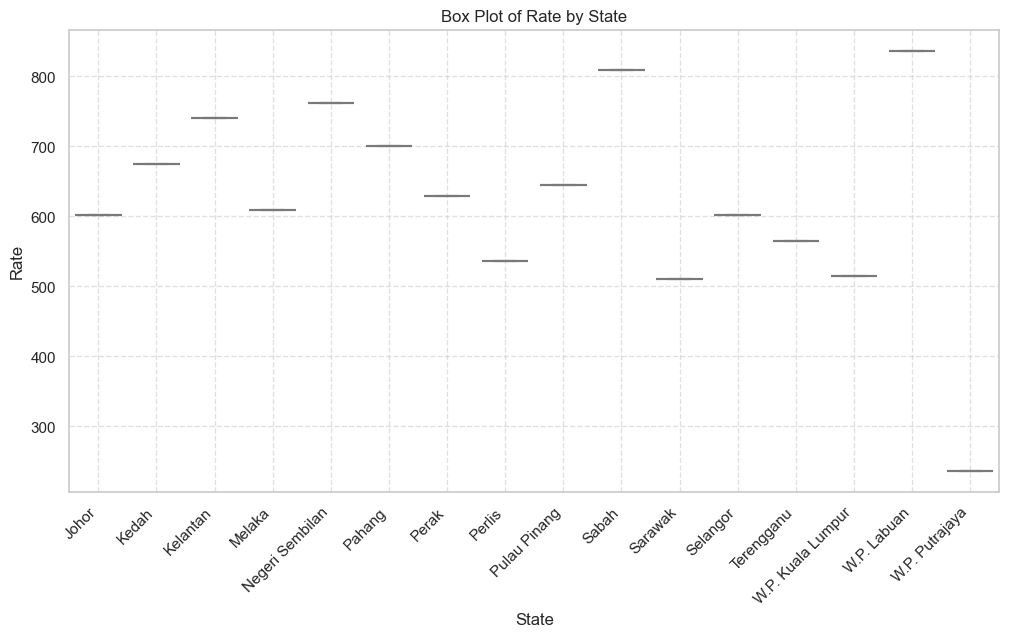

In [32]:
p.plot_box_plot(state_df, x='State', y='Rate', color='lightblue', xlabel='State', ylabel='Rate', title='Box Plot of Rate by State', rotate_labels=True)

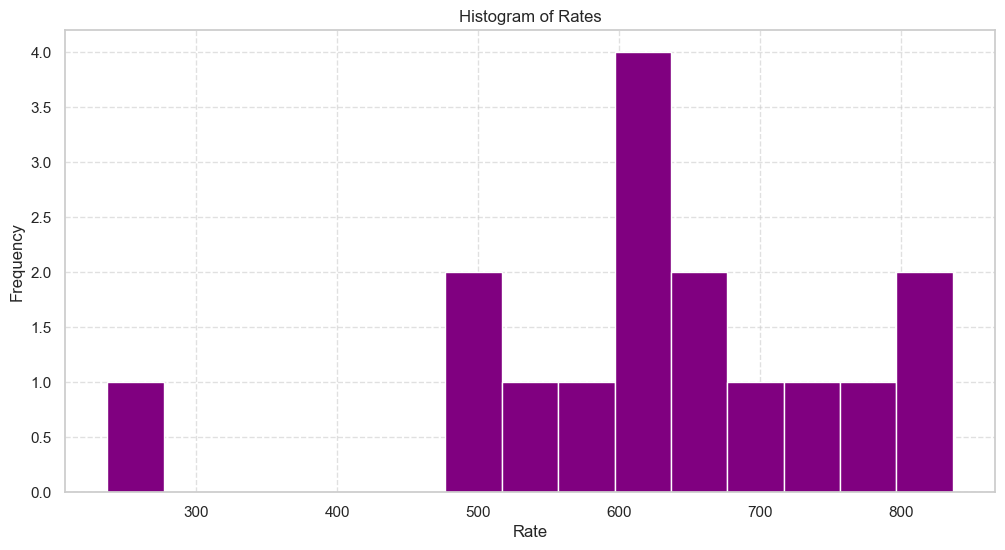

In [33]:
p.plot_histogram(state_df, column='Rate', bins=15, color='purple', xlabel='Rate', ylabel='Frequency', title='Histogram of Rates')